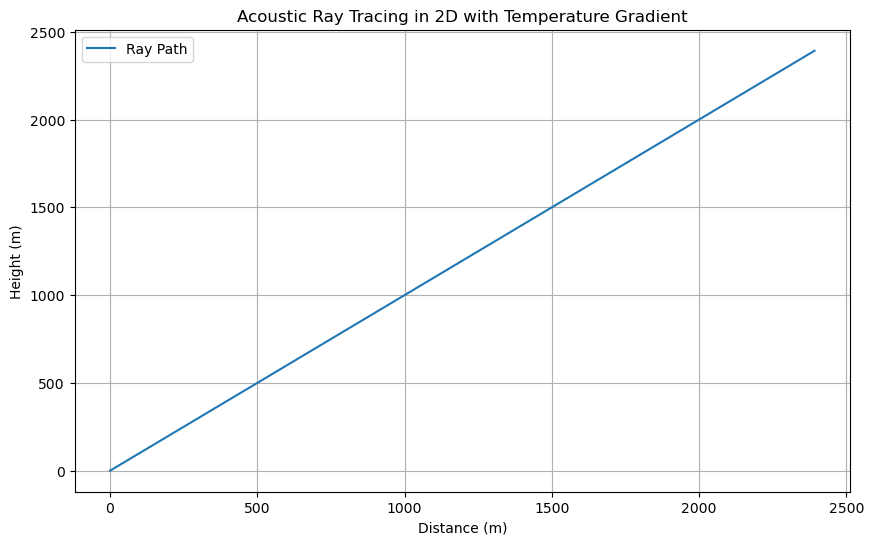

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T0 = 20  # Surface temperature in degrees Celsius
gradient = -0.0065  # Temperature lapse rate in degrees Celsius per meter
c0 = 331.3 + 0.6 * T0  # Speed of sound at surface temperature

# Speed of sound as a function of height y
def speed_of_sound(y):
    T = T0 + gradient * y
    return 331.3 + 0.6 * T

# Ray tracing parameters
x0, y0 = 0, 0  # Initial position
theta0 = np.deg2rad(45)  # Initial angle in radians
dt = 0.01  # Time step
num_steps = 1000  # Number of steps

# Initialize arrays to store ray positions
x = np.zeros(num_steps)
y = np.zeros(num_steps)
theta = np.zeros(num_steps)
x[0], y[0], theta[0] = x0, y0, theta0

# Numerical integration using Euler's method
for i in range(1, num_steps):
    c = speed_of_sound(y[i-1])
    dx = c * np.cos(theta[i-1]) * dt
    dy = c * np.sin(theta[i-1]) * dt
    
    # Update position
    x[i] = x[i-1] + dx
    y[i] = y[i-1] + dy
    
    # Update direction
    dc_dx = 0  # No horizontal gradient in this example
    dc_dy = 0.6 * gradient  # Vertical gradient
    dtheta = - (1 / c) * (np.cos(theta[i-1]) * dc_dx + np.sin(theta[i-1]) * dc_dy) * dt
    theta[i] = theta[i-1] + dtheta

# Plot the ray path
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Ray Path')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Acoustic Ray Tracing in 2D with Temperature Gradient')
plt.grid()
plt.legend()
plt.show()


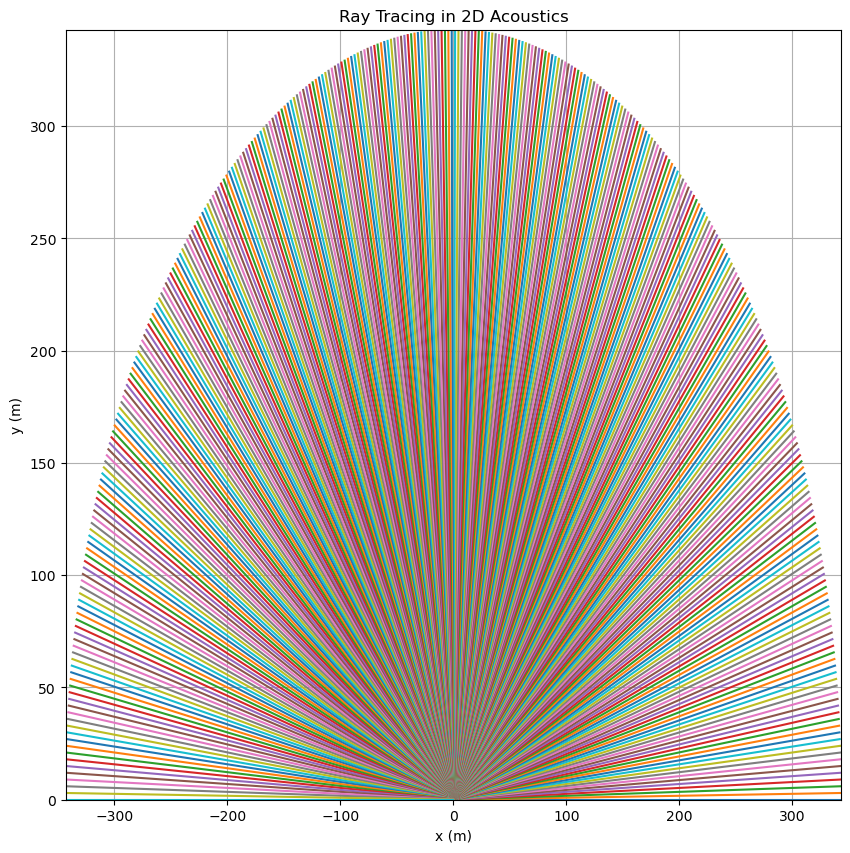

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
x0, y0 = 0, 0  # Source position
num_rays = 360  # Number of rays
c = 343  # Speed of sound in m/s
dt = 0.01  # Time step in seconds
max_time = 1  # Maximum simulation time in seconds

# Initialize arrays
angles = np.linspace(0, np.pi, num_rays)
rays = []

for theta in angles:
    x, y = [x0], [y0]
    for t in np.arange(0, max_time, dt):
        x_new = x[-1] + c * np.cos(theta) * dt
        y_new = y[-1] + c * np.sin(theta) * dt
        x.append(x_new)
        y.append(y_new)
    rays.append((x, y))

# Plotting
plt.figure(figsize=(10, 10))
for ray in rays:
    plt.plot(ray[0], ray[1])
plt.xlim(-max_time * c, max_time * c)
plt.ylim(0, max_time * c)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Ray Tracing in 2D Acoustics')
plt.grid(True)
plt.show()


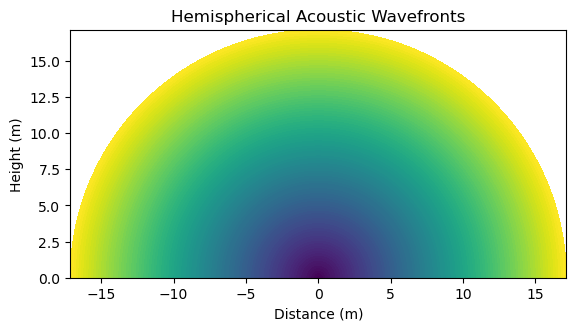

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
c = 343  # Speed of sound in air (m/s)
t_end = 0.05  # End time (s)
dt = 0.001  # Time step (s)
r_max = c * t_end  # Maximum radius (m)
n_points = 500  # Number of points for plotting

# Generate a grid
x = np.linspace(-r_max, r_max, n_points)
y = np.linspace(0, r_max, n_points)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)

# Create figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-r_max, r_max)
ax.set_ylim(0, r_max)
ax.set_aspect('equal')
ax.set_title('Hemispherical Acoustic Wavefronts')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Height (m)')

# Initial contour plot
wavefront = ax.contourf(X, Y, R, levels=np.linspace(0, r_max, 100), cmap='viridis')

# Update function for animation
def update(frame):
    ax.clear()
    ax.set_xlim(-r_max, r_max)
    ax.set_ylim(0, r_max)
    ax.set_aspect('equal')
    ax.set_title('Hemispherical Acoustic Wavefronts')
    ax.set_xlabel('Distance (m)')
    ax.set_ylabel('Height (m)')
    time = frame * dt
    radius = c * time
    wavefront = ax.contourf(X, Y, np.abs(R - radius), levels=np.linspace(0, r_max, 100), cmap='viridis')
    return wavefront.collections

# Create animation
ani = FuncAnimation(fig, update, frames=int(t_end / dt), interval=50, blit=False)
plt.show()


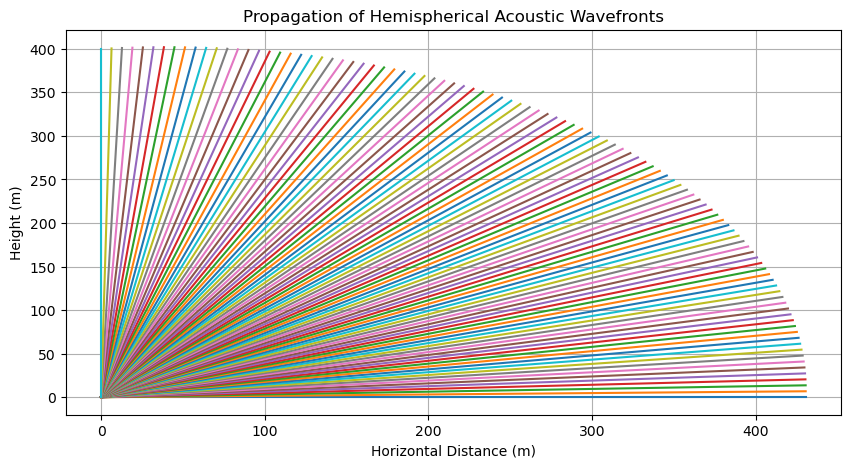

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
gamma = 1.4
R = 287  # Specific gas constant for air, J/(kg·K)

# Environmental parameters
T0 = 400  # Ground temperature in Kelvin
dT_dz = -0.0065  # Temperature gradient in K/m (negative for decreasing temperature with height)
wind_speed_at_ground = 30  # Wind speed at ground level in m/s
wind_gradient = 0.05  # Wind speed gradient in 1/s (change of wind speed per unit height)

# Simulation parameters
num_rays = 100
max_height = 1000  # Maximum height to simulate in meters
max_distance = 2000  # Maximum horizontal distance in meters
num_steps = 1000  # Number of steps for ray tracing

# Initialize ray angles and positions
angles = np.linspace(0, np.pi / 2, num_rays)
positions = np.zeros((num_rays, num_steps, 2))  # Array to store ray positions (x, z)

# Function to calculate the speed of sound at a given height
def speed_of_sound(T):
    return np.sqrt(gamma * R * T)

# Function to calculate temperature at a given height
def temperature(z):
    return T0 + dT_dz * z

# Function to calculate wind speed at a given height
def wind_speed(z):
    return wind_speed_at_ground + wind_gradient * z

# Ray tracing loop
for i, angle in enumerate(angles):
    x, z = 0, 0  # Start at the origin
    dx = np.cos(angle)
    dz = np.sin(angle)
    for step in range(num_steps):
        positions[i, step] = [x, z]
        T = temperature(z)
        c = speed_of_sound(T)
        w = wind_speed(z)
        
        # Effective sound speed considering the wind component in the direction of the ray
        effective_speed = c + w * dx
        
        # Update positions
        x += effective_speed * dx / num_steps
        z += effective_speed * dz / num_steps
        
        # Check if the ray has exceeded the maximum height or distance
        if z > max_height or x > max_distance:
            break

# Plotting the results
plt.figure(figsize=(10, 5))
for i in range(num_rays):
    plt.plot(positions[i, :, 0], positions[i, :, 1], label=f'Ray {i+1}')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Height (m)')
plt.title('Propagation of Hemispherical Acoustic Wavefronts')
# plt.legend()
plt.grid()
plt.show()


NameError: name 'axis0' is not defined

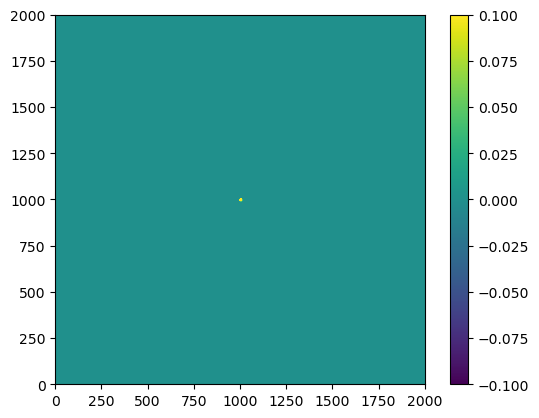

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constants
gamma = 1.4
R = 287.05  # J/(kg·K)

# Sample radiosonde data
data = {
    'Altitude': [0, 1000, 2000],
    'Temperature_C': [15, 10, 5],
    'Wind_Speed': [5, 10, 15],
    'Wind_Direction': [90, 100, 110]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert Temperature to Kelvin
df['Temperature_K'] = df['Temperature_C'] + 273.15

# Calculate Speed of Sound
df['Speed_of_Sound'] = np.sqrt(gamma * R * df['Temperature_K'])

# Assuming sound propagation in the same direction as the wind for simplicity
df['Effective_Speed_of_Sound'] = df['Speed_of_Sound'] + df['Wind_Speed']

# Define the spatial domain
nx, nz = 200, 200  # Grid size
dx, dz = 10, 10    # Grid spacing (meters)
dt = 0.001         # Time step (seconds)
nt = 300           # Number of time steps

# Create the speed of sound profile (2D grid)
speed_of_sound = np.linspace(df['Effective_Speed_of_Sound'][0], df['Effective_Speed_of_Sound'][2], nz).reshape(-1, 1)
speed_of_sound = np.tile(speed_of_sound, (1, nx))

# Initialize the pressure field
p = np.zeros((nz, nx))
p_new = np.zeros((nz, nx))

# Initial condition: Gaussian pulse
x0, z0 = nx // 2, nz // 2
p[z0, x0] = 1

# Arrays to store the previous and next pressure fields
p_prev = np.copy(p)

# Function to update the pressure field
def update_pressure(p, p_prev, speed_of_sound, dx, dz, dt):
    p_new = 2 * p - p_prev + (speed_of_sound**2 * dt**2) * (
        (np.roll(p, 1, axis=1) - 2 * p + np.roll(p, -1, axis=1)) / dx**2 +
        (np.roll(p, 1, axis0) - 2 * p + np.roll(p, -1, axis=0)) / dz**2
    )
    return p_new

# Set up the figure and axis
fig, ax = plt.subplots()
cax = ax.imshow(p, cmap='viridis', vmin=-0.1, vmax=0.1, extent=[0, nx*dx, 0, nz*dz])
fig.colorbar(cax)

# Animation update function
def animate(i):
    global p, p_prev
    p_new = update_pressure(p, p_prev, speed_of_sound, dx, dz, dt)
    p_prev = p
    p = p_new
    cax.set_data(p)
    return cax,

# Run the animation
ani = FuncAnimation(fig, animate, frames=nt, interval=50, blit=True)
plt.xlabel('Distance (m)')
plt.ylabel('Altitude (m)')
plt.title('Hemispherical Acoustic Wavefronts with Wind and Temperature Effects')
plt.show()


/home/murali/anaconda3/lib/python3.11/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


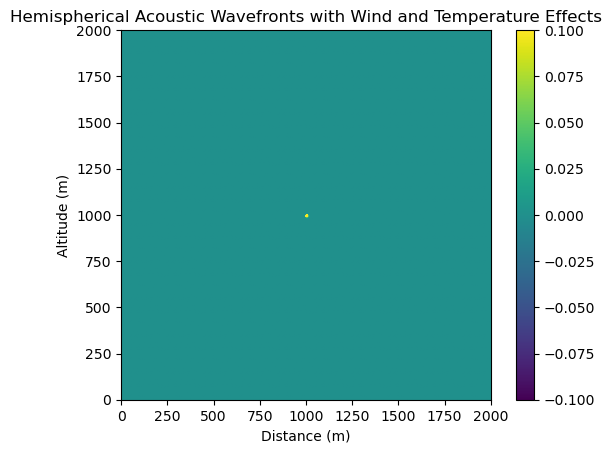

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Sample radiosonde data
data = {
    'Altitude': [0, 1000, 2000],
    'Temperature_C': [15, 10, 5],
    'Wind_Speed': [5, 10, 15],
    'Wind_Direction': [90, 100, 110]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Constants
gamma = 1.4
R = 287.05  # J/(kg·K)

# Convert Temperature to Kelvin
df['Temperature_K'] = df['Temperature_C'] + 273.15

# Calculate Speed of Sound
df['Speed_of_Sound'] = np.sqrt(gamma * R * df['Temperature_K'])

# Assuming sound propagation in the same direction as the wind for simplicity
df['Effective_Speed_of_Sound'] = df['Speed_of_Sound'] + df['Wind_Speed']

# Define the spatial domain
nx, nz = 200, 200  # Grid size
dx, dz = 10, 10    # Grid spacing (meters)
dt = 0.001         # Time step (seconds)
nt = 300           # Number of time steps

# Create the speed of sound profile (2D grid)
speed_of_sound = np.linspace(df['Effective_Speed_of_Sound'][0], df['Effective_Speed_of_Sound'][2], nz).reshape(-1, 1)
speed_of_sound = np.tile(speed_of_sound, (1, nx))

# Initialize the pressure field
p = np.zeros((nz, nx))
p_new = np.zeros((nz, nx))

# Initial condition: Gaussian pulse
x0, z0 = nx // 2, nz // 2
p[z0, x0] = 1

# Arrays to store the previous and next pressure fields
p_prev = np.copy(p)

# Function to update the pressure field
def update_pressure(p, p_prev, speed_of_sound, dx, dz, dt):
    p_new = 2 * p - p_prev + (speed_of_sound**2 * dt**2) * (
        (np.roll(p, 1, axis=1) - 2 * p + np.roll(p, -1, axis=1)) / dx**2 +
        (np.roll(p, 1, axis=0) - 2 * p + np.roll(p, -1, axis=0)) / dz**2
    )
    return p_new

# Set up the figure and axis
fig, ax = plt.subplots()
cax = ax.imshow(p, cmap='viridis', vmin=-0.1, vmax=0.1, extent=[0, nx*dx, 0, nz*dz])
fig.colorbar(cax)

# Animation update function
def animate(i):
    global p, p_prev
    p_new = update_pressure(p, p_prev, speed_of_sound, dx, dz, dt)
    p_prev = p
    p = p_new
    cax.set_data(p)
    return cax,

# Run the animation
ani = FuncAnimation(fig, animate, frames=nt, interval=50, blit=True)
plt.xlabel('Distance (m)')
plt.ylabel('Altitude (m)')
plt.title('Hemispherical Acoustic Wavefronts with Wind and Temperature Effects')
plt.show()



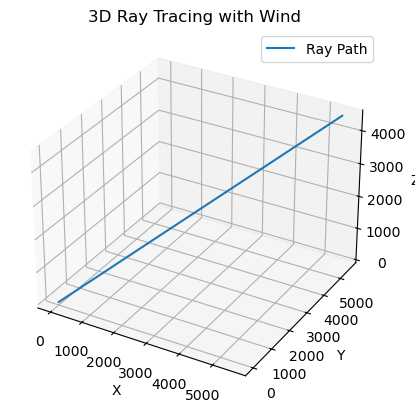

In [7]:

import numpy as np
import matplotlib.pyplot as plt

# Define the speed of sound function and its gradients
def c(x, y, z, c0, alpha_x, alpha_y, alpha_z):
    return c0 + alpha_x * x + alpha_y * y + alpha_z * z

def grad_c(x, y, z, alpha_x, alpha_y, alpha_z):
    return np.array([alpha_x, alpha_y, alpha_z])

# Define the wind speed function
def wind(x, y, z, wx0, wy0, wz0, beta_x, beta_y, beta_z):
    wx = wx0 + beta_x * x
    wy = wy0 + beta_y * y
    wz = wz0 + beta_z * z
    return np.array([wx, wy, wz])

# Define the derivatives of the position and direction
def derivatives(t, state, params):
    x, y, z, theta, phi = state
    c0, alpha_x, alpha_y, alpha_z, wx0, wy0, wz0, beta_x, beta_y, beta_z = params
    
    sound_speed = c(x, y, z, c0, alpha_x, alpha_y, alpha_z)
    wind_speed = wind(x, y, z, wx0, wy0, wz0, beta_x, beta_y, beta_z)
    grad_sound_speed = grad_c(x, y, z, alpha_x, alpha_y, alpha_z)
    
    dx_dt = sound_speed * np.cos(theta) * np.cos(phi) + wind_speed[0]
    dy_dt = sound_speed * np.cos(theta) * np.sin(phi) + wind_speed[1]
    dz_dt = sound_speed * np.sin(theta) + wind_speed[2]
    
    dtheta_dt = -1 / sound_speed * (np.cos(theta) * np.cos(phi) * grad_sound_speed[0] +
                                    np.cos(theta) * np.sin(phi) * grad_sound_speed[1] +
                                    np.sin(theta) * grad_sound_speed[2])
    
    dphi_dt = -1 / sound_speed * (-np.sin(phi) * grad_sound_speed[0] +
                                  np.cos(phi) * grad_sound_speed[1]) / np.cos(theta)
    
    return np.array([dx_dt, dy_dt, dz_dt, dtheta_dt, dphi_dt])

# Runge-Kutta 4th Order Method
def rk4_step(f, t, state, dt, params):
    k1 = f(t, state, params)
    k2 = f(t + dt/2, state + dt/2 * k1, params)
    k3 = f(t + dt/2, state + dt/2 * k2, params)
    k4 = f(t + dt, state + dt * k3, params)
    return state + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

# Simulation parameters
c0 = 340.0          # Base speed of sound in m/s
alpha_x, alpha_y, alpha_z = 0.1, 0.1, 0.1  # Gradients of sound speed
wx0, wy0, wz0 = 0.0, 0.0, 0.0              # Base wind speeds in m/s
beta_x, beta_y, beta_z = 0.0, 0.0, 0.0     # Wind speed gradients

# Initial conditions
x0, y0, z0 = 0.0, 0.0, 0.0  # Initial position
theta0 = np.pi/6            # Initial elevation angle (radians)
phi0 = np.pi/4              # Initial azimuth angle (radians)

initial_state = np.array([x0, y0, z0, theta0, phi0])

# Time parameters
dt = 0.01        # Time step in seconds
t_max = 10.0     # Maximum time in seconds
num_steps = int(t_max / dt)

# Prepare for simulation
state = initial_state
params = (c0, alpha_x, alpha_y, alpha_z, wx0, wy0, wz0, beta_x, beta_y, beta_z)
trajectory = np.zeros((num_steps, 3))

# Run the simulation
for i in range(num_steps):
    trajectory[i] = state[:3]
    state = rk4_step(derivatives, i * dt, state, dt, params)

# Plot the trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], label='Ray Path')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Ray Tracing with Wind')
plt.legend()
plt.show()


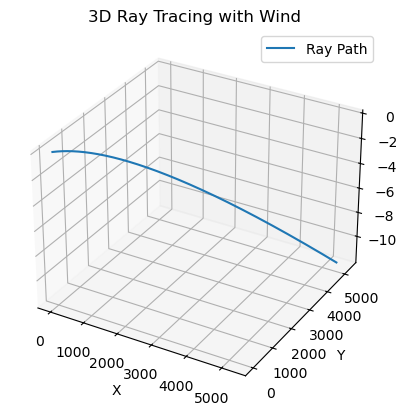

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the speed of sound function and its gradients
def c(x, y, z, c0, alpha_x, alpha_y, alpha_z):
    return c0 + alpha_x * x + alpha_y * y + alpha_z * z

def grad_c(x, y, z, alpha_x, alpha_y, alpha_z):
    return np.array([alpha_x, alpha_y, alpha_z])

# Define the wind speed function
def wind(x, y, z, wx0, wy0, wz0, beta_x, beta_y, beta_z):
    wx = wx0 + beta_x * x
    wy = wy0 + beta_y * y
    wz = wz0 + beta_z * z
    return np.array([wx, wy, wz])

# Define the derivatives of the position and direction
def derivatives(t, state, params):
    x, y, z, theta, phi = state
    c0, alpha_x, alpha_y, alpha_z, wx0, wy0, wz0, beta_x, beta_y, beta_z = params
    
    sound_speed = c(x, y, z, c0, alpha_x, alpha_y, alpha_z)
    wind_speed = wind(x, y, z, wx0, wy0, wz0, beta_x, beta_y, beta_z)
    grad_sound_speed = grad_c(x, y, z, alpha_x, alpha_y, alpha_z)
    
    dx_dt = sound_speed * np.cos(np.radians(theta)) * np.cos(np.radians(phi)) + wind_speed[0]
    dy_dt = sound_speed * np.cos(np.radians(theta)) * np.sin(np.radians(phi)) + wind_speed[1]
    dz_dt = sound_speed * np.sin(np.radians(theta)) + wind_speed[2]
    
    dtheta_dt = -1 / sound_speed * (np.cos(np.radians(theta)) * np.cos(np.radians(phi)) * grad_sound_speed[0] +
                                    np.cos(np.radians(theta)) * np.sin(np.radians(phi)) * grad_sound_speed[1] +
                                    np.sin(np.radians(theta)) * grad_sound_speed[2])
    
    dphi_dt = -1 / sound_speed * (-np.sin(np.radians(phi)) * grad_sound_speed[0] +
                                  np.cos(np.radians(phi)) * grad_sound_speed[1]) / np.cos(np.radians(theta))
    
    return np.array([dx_dt, dy_dt, dz_dt, np.degrees(dtheta_dt), np.degrees(dphi_dt)])

# Runge-Kutta 4th Order Method
def rk4_step(f, t, state, dt, params):
    k1 = f(t, state, params)
    k2 = f(t + dt/2, state + dt/2 * k1, params)
    k3 = f(t + dt/2, state + dt/2 * k2, params)
    k4 = f(t + dt, state + dt * k3, params)
    return state + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

# Simulation parameters
c0 = 340.0          # Base speed of sound in m/s
alpha_x, alpha_y, alpha_z = 0.1, 0.1, 0.1  # Gradients of sound speed
wx0, wy0, wz0 = 0.0, 0.0, 0.0              # Base wind speeds in m/s
beta_x, beta_y, beta_z = 0.0, 0.0, 0.0     # Wind speed gradients

# Initial conditions
x0, y0, z0 = 0.0, 0.0, 0.0  # Initial position
theta0 = 0.0                # Initial elevation angle (degrees)
phi0 = 45.0                 # Initial azimuth angle (degrees)

initial_state = np.array([x0, y0, z0, theta0, phi0])

# Time parameters
dt = 0.01        # Time step in seconds
t_max = 10.0     # Maximum time in seconds
num_steps = int(t_max / dt)

# Prepare for simulation
state = initial_state
params = (c0, alpha_x, alpha_y, alpha_z, wx0, wy0, wz0, beta_x, beta_y, beta_z)
trajectory = np.zeros((num_steps, 3))

# Run the simulation
for i in range(num_steps):
    trajectory[i] = state[:3]
    state = rk4_step(derivatives, i * dt, state, dt, params)
    state[3] = state[3] % 360  # Ensure theta stays within 0-360 degrees
    state[4] = state[4] % 360  # Ensure phi stays within 0-360 degrees

# Plot the trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], label='Ray Path')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Ray Tracing with Wind')
plt.legend()
plt.show()


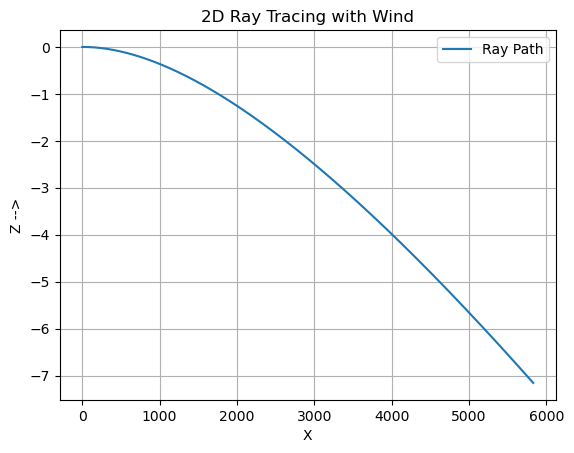

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the speed of sound function and its gradients
def c(x, z, c0, alpha_x, alpha_z):
    return c0 + alpha_x * x + alpha_z * z

def grad_c(x, z, alpha_x, alpha_z):
    return np.array([alpha_x, alpha_z])

# Define the wind speed function
def wind(x, z, wx0, wz0, beta_x, beta_z):
    wx = wx0 + beta_x * x
    wz = wz0 + beta_z * z
    return np.array([wx, wz])

# Define the derivatives of the position and direction
def derivatives(t, state, params):
    x, z, theta = state
    c0, alpha_x, alpha_z, wx0, wz0, beta_x, beta_z = params
    
    sound_speed = c(x, z, c0, alpha_x, alpha_z)
    wind_speed = wind(x, z, wx0, wz0, beta_x, beta_z)
    grad_sound_speed = grad_c(x, z, alpha_x, alpha_z)
    
    dx_dt = sound_speed * np.cos(np.radians(theta)) + wind_speed[0]
    dz_dt = sound_speed * np.sin(np.radians(theta)) + wind_speed[1]
    
    dtheta_dt = -1 / sound_speed * (np.cos(np.radians(theta)) * grad_sound_speed[0] +
                                     np.sin(np.radians(theta)) * grad_sound_speed[1])
    
    return np.array([dx_dt, dz_dt, np.degrees(dtheta_dt)])

# Runge-Kutta 4th Order Method
def rk4_step(f, t, state, dt, params):
    k1 = f(t, state, params)
    k2 = f(t + dt/2, state + dt/2 * k1, params)
    k3 = f(t + dt/2, state + dt/2 * k2, params)
    k4 = f(t + dt, state + dt * k3, params)
    return state + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

# Simulation parameters
c0 = 340.0          # Base speed of sound in m/s
alpha_x, alpha_z = 0.1, 0.1  # Gradients of sound speed
wx0, wz0 = 0.0, 0.0              # Base wind speeds in m/s
beta_x, beta_z = 0.0, 0.0     # Wind speed gradients

# Initial conditions
x0, z0 = 0.0, 0.0  # Initial position
theta0 = 0.0                # Initial elevation angle (degrees)

initial_state = np.array([x0, z0, theta0])

# Time parameters
dt = 0.01        # Time step in seconds
t_max = 10.0     # Maximum time in seconds
num_steps = int(t_max / dt)

# Prepare for simulation
state = initial_state
params = (c0, alpha_x, alpha_z, wx0, wz0, beta_x, beta_z)
trajectory = np.zeros((num_steps, 2))

# Run the simulation
for i in range(num_steps):
    trajectory[i] = state[:2]
    state = rk4_step(derivatives, i * dt, state, dt, params)
    state[2] = state[2] % 360  # Ensure theta stays within 0-360 degrees

# Plot the trajectory
plt.plot(trajectory[:, 0], trajectory[:, 1], label='Ray Path')
plt.xlabel('X')
plt.ylabel('Z -->')
plt.title('2D Ray Tracing with Wind')
plt.legend()
plt.grid(True)
plt.show()


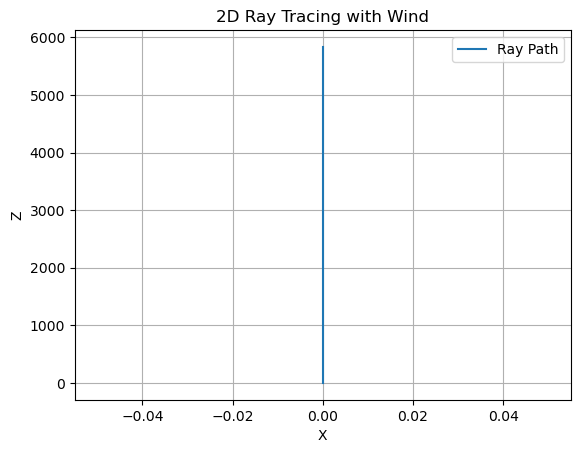

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the speed of sound function and its gradient
def c(z, c0, dz_dc):
    return c0 + dz_dc * z

# Define the wind speed function
def wind(z, vz0, dz_dvz):
    return vz0 + dz_dvz * z

# Define the derivatives of the position and direction
def derivatives(t, state, params):
    x, z, theta = state
    c0, vz0, dz_dc, dz_dvz, dtheta_dz = params
    
    sound_speed = c(z, c0, dz_dc)
    wind_speed = wind(z, vz0, dz_dvz)
    
    dx_dt = wind_speed
    dz_dt = sound_speed * np.cos(np.radians(theta))
    
    dtheta_dt = np.sin(np.radians(theta)) * (dz_dc + np.sin(np.radians(theta)) * (np.cos(np.radians(theta)) * dz_dvz))
    
    return np.array([dx_dt, dz_dt, dtheta_dt])

# Runge-Kutta 4th Order Method
def rk4_step(f, t, state, dt, params):
    k1 = f(t, state, params)
    k2 = f(t + dt/2, state + dt/2 * k1, params)
    k3 = f(t + dt/2, state + dt/2 * k2, params)
    k4 = f(t + dt, state + dt * k3, params)
    return state + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

# Simulation parameters
c0 = 340.0          # Base speed of sound in m/s
vz0 = 0.0           # Base wind speed in m/s
dz_dc = 0.1         # Gradient of speed of sound
dz_dvz = 0.0        # Gradient of wind speed
dtheta_dz = 0.0     # Rate of change of elevation angle with respect to z

# Initial conditions
x0, z0 = 0.0, 0.0       # Initial position
theta0 = 0.0            # Initial elevation angle (degrees)

initial_state = np.array([x0, z0, theta0])

# Time parameters
dt = 0.01        # Time step in seconds
t_max = 10.0     # Maximum time in seconds
num_steps = int(t_max / dt)

# Prepare for simulation
state = initial_state
params = (c0, vz0, dz_dc, dz_dvz, dtheta_dz)
trajectory = np.zeros((num_steps, 2))

# Run the simulation
for i in range(num_steps):
    trajectory[i] = state[:2]
    state = rk4_step(derivatives, i * dt, state, dt, params)

# Plot the trajectory
plt.plot(trajectory[:, 0], trajectory[:, 1], label='Ray Path')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('2D Ray Tracing with Wind')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of differential equations
def wavefront_equations(t, y, v_x, v_y, c_s):
    x, y, theta = y
    dx_dt = v_x(x, y) + c_s(x, y) * np.sin(theta)
    dy_dt = v_y(x, y) + c_s(x, y) * np.cos(theta)
    dtheta_dt = np.sin(theta) * (np.gradient(c_s, y)[1] + np.sin(theta) * np.gradient(v_y, y)[1])
    return [dx_dt, dy_dt, dtheta_dt]

# Initial conditions
x0, y0, theta0 = 0, 0, np.pi / 4
initial_conditions = [x0, y0, theta0]

# Time span for the simulation
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Define flow velocity and sound speed functions
def v_x(x, y):
    return 1  # Example constant flow velocity

def v_y(x, y):
    return 1  # Example constant flow velocity

def c_s(x, y):
    return 1  # Example constant sound speed

# Solve the system of differential equations
solution = solve_ivp(wavefront_equations, t_span, initial_conditions, t_eval=t_eval, args=(v_x, v_y, c_s))

# Extract the solution
x_sol, y_sol, theta_sol = solution.y

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_sol, y_sol, label='Wavefront Path')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Ray Tracing of Acoustic Wavefronts')
plt.legend()
plt.grid(True)
plt.show()


IndexError: list index out of range

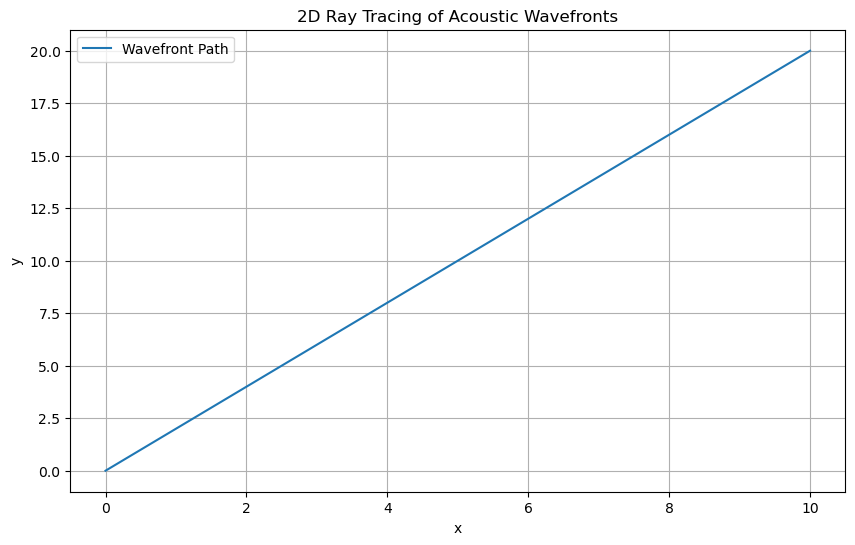

In [12]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of differential equations
def wavefront_equations(t, y, v_x, v_y, c_s, dcs_dy, dvy_dy):
    x, y_pos, theta = y
    dx_dt = v_x(x, y_pos) + c_s(x, y_pos) * np.sin(theta)
    dy_dt = v_y(x, y_pos) + c_s(x, y_pos) * np.cos(theta)
    dtheta_dt = np.sin(theta) * (dcs_dy(x, y_pos) + np.sin(theta) * dvy_dy(x, y_pos))
    return [dx_dt, dy_dt, dtheta_dt]

# Initial conditions
x0, y0, theta0 = 0, 0, 0
initial_conditions = [x0, y0, theta0]

# Time span for the simulation
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Define flow velocity and sound speed functions
def v_x(x, y):
    return 1  # Example constant flow velocity

def v_y(x, y):
    return 1  # Example constant flow velocity

def c_s(x, y):
    return 1  # Example constant sound speed

# Define the derivatives
def dcs_dy(x, y):
    return 0  # Derivative of the sound speed with respect to y (assumed constant)

def dvy_dy(x, y):
    return 0  # Derivative of the y-component of velocity with respect to y (assumed constant)

# Solve the system of differential equations
solution = solve_ivp(wavefront_equations, t_span, initial_conditions, t_eval=t_eval, args=(v_x, v_y, c_s, dcs_dy, dvy_dy))

# Extract the solution
x_sol, y_sol, theta_sol = solution.y

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_sol, y_sol, label='Wavefront Path')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Ray Tracing of Acoustic Wavefronts')
plt.legend()
plt.grid(True)
plt.show()
